c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Accuracy (Test) C = 1e-12 : 0.82


c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Accuracy (Test) C = 1e-06 : 0.82


c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Accuracy (Test) C = 1 : 0.83


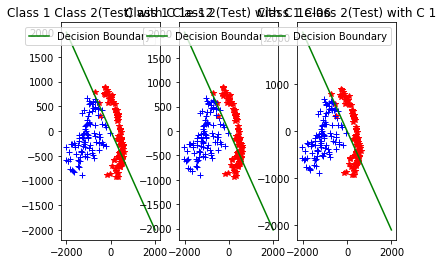

c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Accuracy (Train) C = 1e-12 : 0.8669201520912547


c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Accuracy (Train) C = 1e-06 : 0.8669201520912547


c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Accuracy (Train) C = 1 : 0.8669201520912547


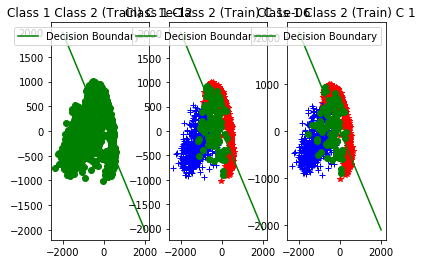

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

x_train = pd.read_csv('sample_train.csv')
x_train = np.array(x_train)
y_train = x_train[:, 0]
x_train = x_train[:, 1:x_train.shape[1]]
x_test = pd.read_csv('sample_test.csv')
x_test = np.array(x_test)
y_test = x_test[:, 0]
x_test = x_test[:, 1:x_test.shape[1]]
x = []
m = []
y = []
n = []
for i in range(x_test.shape[0]):
    if y_test[i] == 1:
        x = np.append(x, x_test[i, :])
        y = np.append(y, y_test[i])
    if y_test[i] == 2:
        x = np.append(x, x_test[i, :])
        y = np.append(y, y_test[i])
for i in range(x_train.shape[0]):
    if y_train[i] == 1:
        m = np.append(m, x_train[i, :])
        n = np.append(n, y_train[i])
    if y_train[i] == 2:
        m = np.append(m, x_train[i, :])
        n = np.append(n, y_train[i])
x = np.array(x)
x = np.reshape(x, (len(x) // 784, 784))
y = np.array(y)
y = np.reshape(y, (len(y), 1))
m = np.array(m)
m = np.reshape(m, (len(m) // 784, 784))
n = np.array(n)
n = np.reshape(n, (len(n), 1))

cov_test = np.cov(x.T)
evalue, evct = np.linalg.eig(cov_test)
vt = evct[:, 0:2]
x_evct = x.dot(vt)
vct = np.pad(vt, ((0, 1), (0, 1)), 'constant')
vct[784, :] = 1
vct[:, 2] = 1
### Accuracy calculation

p = [0.000000000001, 0.000001, 1]
for k in range(len(p)):
    plt.subplot(1, len(p), k + 1)
    plt.title("Class 1 Class 2(Test) with C {}".format(p[k]))
    for i in range(x.shape[0]):
        if y[i] == 1:
            plt.plot(x_evct[i, 0], x_evct[i, 1], 'r*')

        if y[i] == 2:
            plt.plot(x_evct[i, 0], x_evct[i, 1], 'b+')
    svclassifier = SVC(kernel='linear', C=p[k])
    svclassifier.fit(m, n)
    c = svclassifier.coef_
    z = svclassifier.intercept_
    c = np.append(c, z)
    c_evct = c.T.dot(vct)
    w = c_evct
    # print(w, 'ww')
    a = -w[0] / w[1]
    xx = np.linspace(-2000, 2000)
    yy = a * xx - (w[2]) / w[1]
    plt.plot(xx, yy, 'g', label='Decision Boundary')
    count_2 = 0
    count_1 = 0
    z = 0
    for i in range(x.shape[0]):
        if y[i] == 1 or y[i] == 2:
            z = z + 1
        if (x_evct[i]).dot(w[0:2]) + w[2] < 0 and y[i] == 1:
            count_2 = count_2 + 1
        if (x_evct[i]).dot(w[0:2]) + w[2] >= 0 and y[i] == 2:
            count_1 = count_1 + 1
    print("Accuracy (Test) C = {} :".format(p[k]), (count_1 + count_2) / z)
    plt.legend(loc='upper right')
plt.show()

x_evct = x_train.dot(vt)
for k in range(len(p)):
    plt.subplot(1, len(p), k + 1)
    plt.title("Class 1 Class 2 (Train) C {}".format(p[k]))
    for i in range(x_train.shape[0]):
        if y_train[i] == 1:
            plt.plot(x_evct[i, 0], x_evct[i, 1], 'r*')
        if y_train[i] == 2:
            plt.plot(x_evct[i, 0], x_evct[i, 1], 'b+')
    svclassifier = SVC(kernel='linear', C=p[k])
    svclassifier.fit(m, n)
    # print(m.shape, 'm')
    c = svclassifier.coef_
    z = svclassifier.intercept_
    y_alpha = svclassifier.dual_coef_
    sv = svclassifier.support_vectors_
    q = sv.dot(vt)
    for i in range(q.shape[0]):
        plt.plot(q[i, 0], q[i, 1], 'go')
    c = np.append(c, z)
    c_evct = c.T.dot(vct)
    w = c_evct
    a = -w[0] / w[1]
    xx = np.linspace(-2000, 2000)
    yy = a * xx - (w[2]) / w[1]
    plt.plot(xx, yy, 'g', label='Decision Boundary')
    count_2 = 0
    count_1 = 0
    z = 0
    for i in range(m.shape[0]):
        if y_train[i] == 1 or y_train[i] == 2:
            z = z + 1
        if (x_evct[i]).dot(w[0:2]) + w[2] < 0 and y_train[i] == 1:
            count_2 = count_2 + 1
        if (x_evct[i]).dot(w[0:2]) + w[2] >= 0 and y_train[i] == 2:
            count_1 = count_1 + 1
    print("Accuracy (Train) C = {} :".format(p[k]), (count_1 + count_2) / z)
    plt.legend(loc='upper right')
plt.show()


In [6]:
import numpy as np


def lr(z):
    a = 1 / (1 + np.exp(-z))
    return a


### Random values Generation
p = np.random.normal(0, 1, 500) / 10000  # y = 1
q = np.random.normal(0, 2, 500) / 10000  # y = -1
sample = [p, q]
sample = sample
sample_min = np.min(sample)
sample = np.array(sample)
w = 2
eta = 0.1
update_sum = 0

### Gradient descent implementation of Linear Regression
for i in range(2):
    for j in range(500):
        if i == 0:
            update_sum += (1 - sample[i, j] * w) * (-sample[i, j])
        if i == 1:
            update_sum += (-1 - sample[i, j] * w) * (-sample[i, j])
w = w - 2 * eta * update_sum

while np.abs(update_sum) > 0.001:
    for i in range(2):
        for j in range(500):
            if i == 0:
                update_sum += (1 - sample[i, j] * w) * (-sample[i, j])
            if i == 1:
                update_sum += (-1 - sample[i, j] * w) * (-sample[i, j])
    w = w - 2 * eta * update_sum

### Minimum by Linear regression
v = 0
for i in range(2):
    for j in range(500):
        if i == 0:
            v += (1 - sample[i, j] * w) ** 2
        if i == 1:
            v += (-1 - sample[i, j] * w) ** 2
print(v, '= Value by Linear Regression')
val = 0

### Minimum Value Desired
z = []
for k in sample:
    for i in range(2):
        for j in range(500):
            if i == 0:
                val += (1 - sample[i, j] * k) ** 2
            if i == 1:
                val += (-1 - sample[i, j] * k) ** 2
    z = np.append(z, val)
val = np.min(z)
print(val, "= Minimum Desired Value")

### Gradient Descent implementation of Logistic Regression
update_sum = 0
for i in range(2):
    for j in range(500):
        if i == 0:
            update_sum += (1 - lr(sample[i, j] * w)) * (-sample[i, j]) * (lr(sample[i, j] * w)) ** 2
        if i == 1:
            update_sum += (-1 - lr(sample[i, j] * w)) * (-sample[i, j]) * (lr(sample[i, j] * w)) ** 2
w = w - 2 * eta * update_sum

while update_sum > 0.001:
    for i in range(2):
        for j in range(500):
            if i == 0:
                update_sum += (1 - lr(sample[i, j] * w)) * (-sample[i, j]) * (lr(sample[i, j] * w)) ** 2
            if i == 1:
                update_sum += (-1 - lr(sample[i, j] * w)) * (-sample[i, j]) * (lr(sample[i, j] * w)) ** 2
    w = w - 2 * eta * update_sum

### Minimum Value using Logistic Regression
value = 0
for i in range(2):
    for j in range(500):
        if i == 0:
            value += (1 - lr(sample[i, j] * w)) ** 2
        if i == 1:
            value += (-1 - lr(sample[i, j] * w)) ** 2
print(value, "= Value By Logistic Regression")
print(np.abs(v - val), '= Difference between Desired Min and Linear Regression')
print(np.abs(value - val), '= Difference between Desired Min and Logistic Regression')

1000.0182547536157 = Value by Linear Regression
999.9999975088089 = Minimum Desired Value
1249.0818663548935 = Value By Logistic Regression
0.018257244806818562 = Difference between Desired Min and Linear Regression
249.0818688460846 = Difference between Desired Min and Logistic Regression
